In [64]:
options(warn=-1)
suppressWarnings({
    libs <- c("tidyverse","gridExtra")
load.libs <- function(x){
  for(i in x){
    if(!require(i,character.only = TRUE )){
      install.packages(i,dependencies = TRUE )
      library(i,character.only = TRUE )
    }
  }
}
load.libs(libs)
})

### 2016 Survey Data

In [2]:
data_unstructured<-read.csv("data/data2016_coded.csv")

In [3]:
relevant_info<-c("Q1.a", "Q1.b", "Q1.c", "Q1.d", "Q1.e", "Q1.f", "Q1.g", "Q1.h", 
                 "Q1.1", "Q1.2", "Q2.a", "Q2.b", "Q2.c", "Q2.d", "Q2.e", "Q2.f", 
                 "Q3.a", "Q3.b", "Q3.c", "Q3.d", "Q3.e", "Q3.f", "Q3.g", "Q3.h", 
                 "Q3.i", "Q3.j", "Q3.k", "Q3.l", "Q3.m", "Q3.n", "Q3.o", 
                 "DormBuilding", "Level")

data<-data_unstructured%>%
    filter(Level %in% c("Freshman", "Sophomore", "Junior", "Senior"))%>% #7
    select(all_of(relevant_info))%>%
    mutate(On_Campus = as.factor(ifelse(DormBuilding == "No Dorm", 0, 1)),
           Level = as.factor(Level),
           Upper_Classman = as.factor(ifelse(Level %in% c("Freshman", "Sophomore"), 0, 1)))%>%
    select(-c("DormBuilding", "Level"))

data<-data[complete.cases(data),]
head(data)

Q1.a,Q1.b,Q1.c,Q1.d,Q1.e,Q1.f,Q1.g,Q1.h,Q1.1,Q1.2,...,Q3.h,Q3.i,Q3.j,Q3.k,Q3.l,Q3.m,Q3.n,Q3.o,On_Campus,Upper_Classman
7,7,7,1,3,1,1,5,3,4,...,4,0,0,0,0,0,3,2,0,1
6,3,5,5,6,1,3,6,4,4,...,5,5,4,5,5,5,4,3,0,1
5,5,5,5,3,1,1,2,1,3,...,3,4,5,5,3,2,3,3,0,1
6,5,7,7,7,3,3,4,5,5,...,0,5,0,0,0,5,3,5,0,1
7,5,6,6,7,3,1,5,3,3,...,5,5,5,5,5,5,2,3,0,1
5,4,5,5,6,1,1,3,3,5,...,5,4,0,4,3,4,4,1,1,1


516 undergraduate students were surveyed in OSI's 2016 Sustainability Literacy Assessment, 466 of whom remain for analysis following preprocessing. The survey collected information on students’ sustainability-related behaviors and values, as well as on their overall knowledge of sustainability issues. Students rated 10 sustainability-related behaviors on a 7-point scale (Q1.a -- Q1.h, Q1.1, Q1.2) based on how often they act in such ways, with 1 being “never” and 7 being “always.” Similarly, their personal values regarding sustainability are captured by how much they align with six statements on a 7-point scale (Q2.a -- Q2.f). The specific questions of the survey can be found in Appendix A. In that regard, students also provided their class year and place of residence. Underclassmen, namely first and second-year students, are required to live on-campus barring special circumstances. As such, only two underclassmen in the data live off-campus as shown in Table 1. The number of underclassmen and upperclassmen is approximately uniform, albeit 82\% of all respondents live on-campus. 

[table 1]

Having spent more time at Emory compared to underclassman, upperclassmen have had more opportunities to engage in sustainability initiatives on campus—regardless of their place of residence. In this context, upperclassmen should report higher increases in sustainable behavior (Q1.1) and awareness of social justice (Q1.2) since beginning their studies. The average ratings of Q1.1 and Q1.2 among the two groups are found in Table 2, along with corresponding two-sample t-tests to evaluate their statistical significance at the 0.05 significance level. Among underclassmen, the mean Q1.1 and Q1.2 ratings are 3.16 and 3.76, respectively. Upperclassmen only reported marginally higher averages for both Q1.1 and Q1.2, contrary to expectations. The difference in overall sustainable behavior and social justice awareness between underclassmen and upperclassmen is not statistically significant. Nonetheless, their levels of sustainability are not necessarily equal: upperclassmen who live off-campus forego certain sustainable behaviors because they have less access to campus resources.

In [4]:
#table 2
data%>%
    group_by(Upper_Classman)%>%
    summarise(mean_Q1.1 = mean(Q1.1),
              mean_Q1.2 = mean(Q1.2))

Upper_Classman,mean_Q1.1,mean_Q1.2
0,3.155172,3.762931
1,3.252137,3.837607


In [5]:
t.test(Q1.1 ~ Upper_Classman, data)
t.test(Q1.2 ~ Upper_Classman, data)


	Welch Two Sample t-test

data:  Q1.1 by Upper_Classman
t = -0.94591, df = 459.47, p-value = 0.3447
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2984081  0.1044795
sample estimates:
mean in group 0 mean in group 1 
       3.155172        3.252137 



	Welch Two Sample t-test

data:  Q1.2 by Upper_Classman
t = -0.69426, df = 461.94, p-value = 0.4879
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2860457  0.1366941
sample estimates:
mean in group 0 mean in group 1 
       3.762931        3.837607 


In [6]:
t.test(Q1.1 ~ Upper_Classman, data[data$On_Campus == 1,])
t.test(Q1.2 ~ Upper_Classman, data[data$On_Campus == 1,])


	Welch Two Sample t-test

data:  Q1.1 by Upper_Classman
t = -1.5214, df = 304.07, p-value = 0.1292
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.41023227  0.05248423
sample estimates:
mean in group 0 mean in group 1 
       3.160870        3.339744 



	Welch Two Sample t-test

data:  Q1.2 by Upper_Classman
t = -1.1858, df = 317.79, p-value = 0.2366
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3795987  0.0940915
sample estimates:
mean in group 0 mean in group 1 
       3.773913        3.916667 


Consider the use of lower-impact transportation (Q1.d) among upperclassmen based on their place of residence. Compared to the number of upperclassmen in the data who live off-campus, there are twice as many on-campus upperclassmen at 156. 50\% of on-campus upperclassmen rated their use of lower-impact transportation as 5 or greater, while the median Q1.d rating of off-campus upperclassmen is only 4. At the 0.05 significance level, the difference in median ratings is statistically significant in the Wilcoxon Rank Sum Test. Off-campus housing has a significant effect on the frequency that upperclassmen use lower-impact transportation. Beyond transportation costs, off-campus students also take on more responsibility for making their own dietary choices.

In [63]:
#table 3
data%>%
    filter(Upper_Classman == 1)%>%
    group_by(On_Campus)%>%
    summarise(count = n(),
              mean_Q1.d = mean(Q1.d),
              median_Q1.d = median(Q1.d),
              sd_Q1.d = sd(Q1.d))

On_Campus,count,mean_Q1.d,median_Q1.d,sd_Q1.d
0,78,4.205128,4,1.804460
1,156,4.782051,5,1.682145


In [12]:
wilcox.test(Q1.d ~ On_Campus, data[data$Upper_Classman == 1,], alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  Q1.d by On_Campus
W = 4895.5, p-value = 0.01343
alternative hypothesis: true location shift is not equal to 0


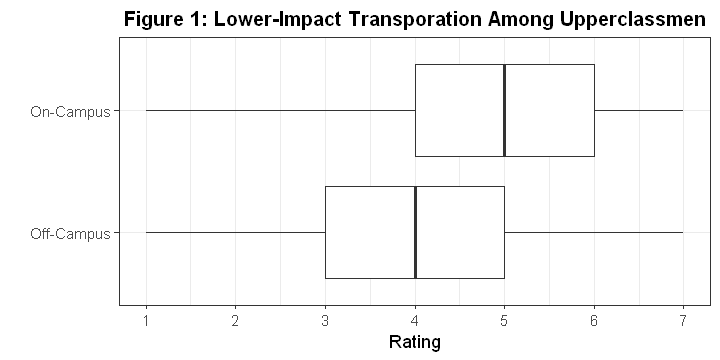

In [61]:
options(repr.plot.height = 3, repr.plot.width = 6)
data[data$Upper_Classman == 1,]%>%
    mutate(On_Campus = ifelse(On_Campus == 0, "Off-Campus", "On-Campus"))%>%
    ggplot()+
    geom_boxplot(aes(Q1.d, On_Campus))+
    scale_x_continuous(breaks = seq(1,7,1))+
    labs(title = "Figure 1: Lower-Impact Transporation Among Upperclassmen",
         x = "Rating",
         y = "")+
    theme_bw()+
    theme(plot.title = element_text(size = 12, hjust = 0.5, face = "bold"),
          axis.title.y = element_text(size = 10, face = "bold"))

Meal plans are completely voluntary for off-campus students, but they are required for on-campus students. The available options slightly vary by class year with upperclassmen typically having less restrictions.